# Plot simulations results
Plot simulation results from the Mathematica script as kymographs and lineplots for snapshots in time. Direct comparison with experimental data not implemented.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Load data

In [26]:
## Import saved data
folder = './Model_results'
file_id_str = 'best_model'
fnames = ['data_parameters.csv', 'data_rho_1.csv', 'data_phi_1.csv', 'data_V_1.csv']

## Load parameters
df=pd.read_csv( os.path.join(folder, file_id_str+'_'+fnames[0]), header=None, index_col=0 )
df

,1
0,
eO,12960
eM,1944/5
η,18/5
γ,2.88
τ,10
D1,15
α,3.5e-6
ρdA,0.0067
ρdB,0.0077


In [11]:
## Load simulation results
datas = []
datas.append( pd.read_csv( os.path.join(folder, file_id_str+fnames[1]), header=None ).T ) # rho
datas.append( pd.read_csv( os.path.join(folder, file_id_str+fnames[2]), header=None ).T ) # phi
datas.append( pd.read_csv( os.path.join(folder, file_id_str+fnames[3]), header=None ).T ) # V


## Plot heatmaps

In [12]:
## Extract parameters
L=float(df.loc['L'].values[0])
Nx = int(df.loc['Nx'].values[0])
tmax = float(df.loc['tmax'].values[0])
T = int(df.loc['T'].values[0])

In [16]:
## Common plot variables
dpi = 100 # set to 300 for saving
int_method = 'spline16'; # interpolation
titles = ['$\\rho(x,t)$', '$\\phi(x,t)$', '$V(x,t)$']
cmap_ranges = [(0.005, 0.01), (0, 1), (0, 12)]

# Plot styling
plt.rcParams.update({'font.family':'Arial', 'font.size':14})


In [33]:
## Adjust plot limits
xlims = np.array([30, 170]) # x index limits
xlims_um = xlims*(2*L/Nx)-L # x limits in microns

tlims = np.array([0, 75]) # t index limits
tlims_hr = tlims*(tmax/T) # t limits in hours
tlims_hr

extent = (xlims_um[0], xlims_um[1], tlims_hr[0], tlims_hr[1])

<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
/var/folders/wt/pj2fzlzx4g142q4z8ck0t5qh0000gp/T/ipykernel_88953/3529868443.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$x (\mu m)$')


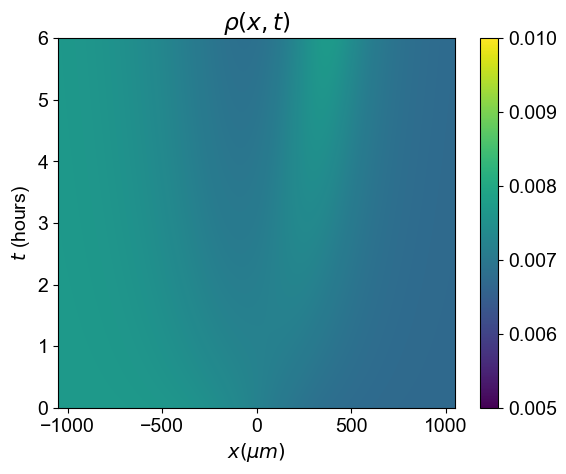

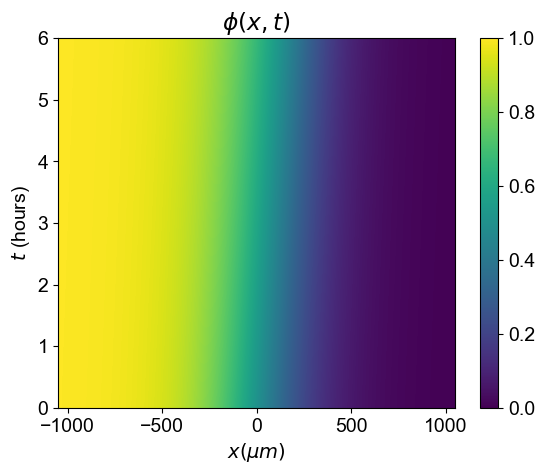

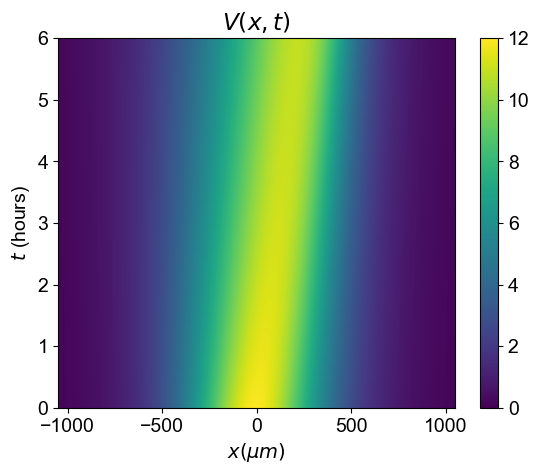

In [41]:
## Plot kymographs
# Save figure settings
save_folder = './Figures'
save_fnames = [file_id_str+'_plot_kymo_rho_', 
               file_id_str+'_plot_kymo_phi_', 
               file_id_str+'_plot_kymo_V_']
save = True


for idx in range(3):
    plt.figure(dpi=dpi)
    plt.imshow(datas[idx].iloc[tlims[0]:tlims[1], xlims[0]:xlims[1] ], origin='lower', extent=extent, aspect='auto', interpolation=int_method,
              vmin=cmap_ranges[idx][0], vmax=cmap_ranges[idx][1])
    plt.xlabel('$x (\mu m)$')
    plt.ylabel('$t$ (hours)')
    plt.title(titles[idx])
    plt.colorbar()
    
    if save:
        fname_out = os.path.join(save_folder, save_fnames[idx]+'.pdf');
        plt.savefig(fname_out, format='pdf')

    plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\,'
<>:8: SyntaxWarning: invalid escape sequence '\,'
<>:20: SyntaxWarning: invalid escape sequence '\,'
<>:8: SyntaxWarning: invalid escape sequence '\,'
<>:8: SyntaxWarning: invalid escape sequence '\,'
<>:20: SyntaxWarning: invalid escape sequence '\,'
/var/folders/wt/pj2fzlzx4g142q4z8ck0t5qh0000gp/T/ipykernel_88953/3024560182.py:8: SyntaxWarning: invalid escape sequence '\,'
  ylabels = ['$\\rho\,\, (\mu m^{-2})$', '$\\phi$', '$V\,\, (\mu m/hr)$']
/var/folders/wt/pj2fzlzx4g142q4z8ck0t5qh0000gp/T/ipykernel_88953/3024560182.py:8: SyntaxWarning: invalid escape sequence '\,'
  ylabels = ['$\\rho\,\, (\mu m^{-2})$', '$\\phi$', '$V\,\, (\mu m/hr)$']
/var/folders/wt/pj2fzlzx4g142q4z8ck0t5qh0000gp/T/ipykernel_88953/3024560182.py:20: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$x\,\, (\mu m)$')


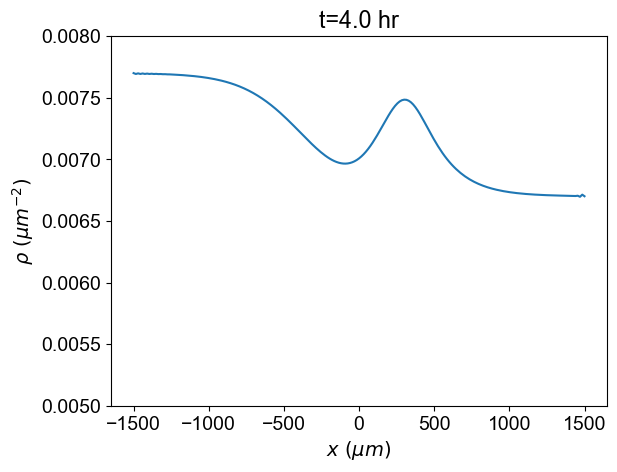

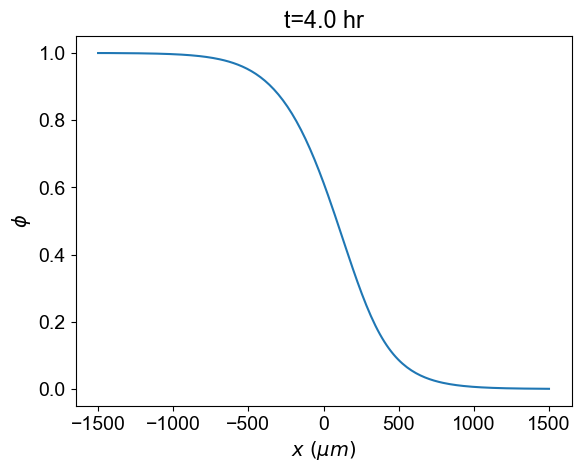

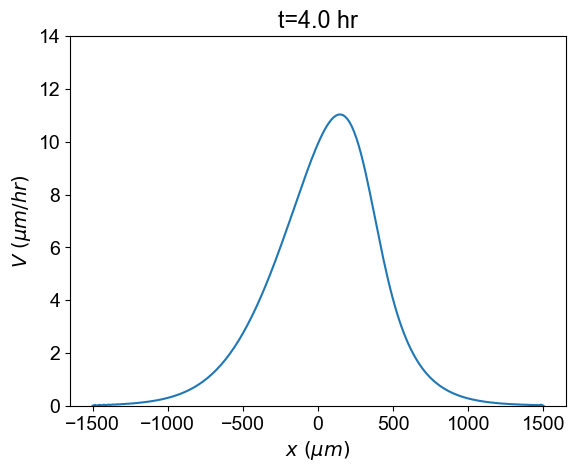

In [40]:
## Plot a snapshot
# Time to plot
t_idx = int(T/2) # time index
t_hr = t_idx/T*tmax # convert to hours

# Y limits (manually set)
ylims = [(0.005, 0.008), (-0.05, 1.05), (0, 14)]
ylabels = ['$\\rho\,\, (\mu m^{-2})$', '$\\phi$', '$V\,\, (\mu m/hr)$']

# Save options
save_folder = './Figures'
save_fnames=[file_id_str+'_plot_rho_t_idx_'+str(t_idx), 
             file_id_str+'_plot_phi_t_idx_'+str(t_idx), 
             file_id_str+'_plot_V_t_idx_'+str(t_idx)]

for idx in range(3):
    plot_data = datas[idx].iloc[ int(t_idx), ]

    plt.figure(dpi=dpi)
    plt.plot(np.linspace(-L, L, Nx+1), plot_data)
    plt.ylim(ylims[idx])
    plt.title('t={} hr'.format(t_hr) )
    plt.xlabel('$x\,\, (\mu m)$')
    plt.ylabel( ylabels[idx] )
    
    if save:
        fname_out = os.path.join(save_folder, save_fnames[idx]+'.pdf')
        plt.savefig(fname_out)
    
    plt.show()